## Classes `Card` and `DeckOfCards` 
#### Creating, Shuffling and Dealing the Cards 

In [3]:
from deck import DeckOfCards

In [4]:
deck_of_cards = DeckOfCards()

In [5]:
print(deck_of_cards)

Ace of Hearts      2 of Hearts        3 of Hearts        4 of Hearts        
5 of Hearts        6 of Hearts        7 of Hearts        8 of Hearts        
9 of Hearts        10 of Hearts       Jack of Hearts     Queen of Hearts    
King of Hearts     Ace of Diamonds    2 of Diamonds      3 of Diamonds      
4 of Diamonds      5 of Diamonds      6 of Diamonds      7 of Diamonds      
8 of Diamonds      9 of Diamonds      10 of Diamonds     Jack of Diamonds   
Queen of Diamonds  King of Diamonds   Ace of Clubs       2 of Clubs         
3 of Clubs         4 of Clubs         5 of Clubs         6 of Clubs         
7 of Clubs         8 of Clubs         9 of Clubs         10 of Clubs        
Jack of Clubs      Queen of Clubs     King of Clubs      Ace of Spades      
2 of Spades        3 of Spades        4 of Spades        5 of Spades        
6 of Spades        7 of Spades        8 of Spades        9 of Spades        
10 of Spades       Jack of Spades     Queen of Spades    King of Spades     

In [6]:
deck_of_cards.shuffle()

In [7]:
print(deck_of_cards)

3 of Spades        Ace of Diamonds    8 of Spades        5 of Clubs         
Queen of Hearts    4 of Diamonds      8 of Hearts        King of Diamonds   
3 of Diamonds      6 of Diamonds      4 of Spades        Ace of Spades      
9 of Spades        Jack of Diamonds   5 of Diamonds      King of Clubs      
7 of Spades        3 of Hearts        9 of Clubs         Queen of Diamonds  
King of Spades     7 of Hearts        2 of Spades        9 of Hearts        
10 of Diamonds     10 of Hearts       9 of Diamonds      King of Hearts     
3 of Clubs         4 of Hearts        Ace of Clubs       5 of Spades        
7 of Clubs         Jack of Spades     4 of Clubs         6 of Clubs         
10 of Clubs        Ace of Hearts      2 of Clubs         2 of Hearts        
5 of Hearts        7 of Diamonds      8 of Clubs         6 of Spades        
10 of Spades       Queen of Spades    Jack of Clubs      8 of Diamonds      
6 of Hearts        Jack of Hearts     2 of Diamonds      Queen of Clubs     

#### Dealing Cards

In [8]:
  
deck_of_cards.deal_card()

Card(face='3', suit='Spades')

#### Class Card’s Other Features

In [9]:
card = deck_of_cards.deal_card()

In [10]:
str(card)

'Ace of Diamonds'

In [11]:
card.image_name

'Ace_of_Diamonds.png'

## Class `Card`—Introducing Class Attributes 
#### Class Attributes `FACES` and `SUITS` 
```python
# card.py
"""Card class that represents a playing card and its image file name."""

class Card:
    FACES = ['Ace', '2', '3', '4', '5', '6',
             '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']


```
#### Card Method `__init__` 
```python

    def __init__(self, face, suit):
        """Initialize a Card with a face and suit."""
        self._face = face
        self._suit = suit


```
#### Read-Only Properties `face`, `suit` and `image_name` 
```python
    @property
    def face(self):
        """Return the Card's self._face value."""
        return self._face

    @property
    def suit(self):
        """Return the Card's self._suit value."""
        return self._suit

    @property
    def image_name(self):
        """Return the Card's image file name."""
        return str(self).replace(' ', '_') + '.png'


```
#### Methods that Return String Representations of a Card 
```python

    def __repr__(self):
        """Return string representation for repr()."""
        return f"Card(face='{self.face}', suit='{self.suit}')"     



    def __str__(self):
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'



    def __format__(self, format):
        """Return formatted string representation for str()."""
        return f'{str(self):{format}}'
```

## Class `DeckOfCards` 
#### Method `__init__`
```python
# deck.py
"""Deck class represents a deck of Cards."""
import random 
from card import Card

class DeckOfCards:
    NUMBER_OF_CARDS = 52  # constant number of Cards

    def __init__(self):
        """Initialize the deck."""
        self._current_card = 0
        self._deck = []

        for count in range(DeckOfCards.NUMBER_OF_CARDS):  
            self._deck.append(Card(Card.FACES[count % 13], 
                Card.SUITS[count // 13]))


```
#### Method `shuffle`
```python
    def shuffle(self):
        """Shuffle deck."""
        self._current_card = 0
        random.shuffle(self._deck)    


```
#### Method `deal_card`
```python

    def deal_card(self):
        """Return one Card."""
        try:
            card = self._deck[self._current_card]
            self._current_card += 1
            return card
        except:
            return None  


```
#### Method `__str__`
```python

    def __str__(self):
        """Return a string representation of the current _deck."""
        s = ''

        for index, card in enumerate(self._deck):
            s += f'{self._deck[index]:<19}'
            if (index + 1) % 4 == 0:
                s += '\n'
        
        return s

```

## Displaying Card Images with Matplotlib 

In [21]:
from deck import DeckOfCards

In [22]:
deck_of_cards = DeckOfCards()

#### Enable Matplotlib in IPython

In [23]:
%matplotlib inline

#### Create the Base `Path` for Each Image

In [24]:
from pathlib import Path

In [25]:
path = Path('.').joinpath('card_images')

#### Import the Matplotlib Features

In [26]:
import matplotlib.pyplot as plt

In [27]:
import matplotlib.image as mpimg

#### Create the `Figure` and `Axes` Objects, Configure the `Axes` Objects and Display the Images and Maximize the Image Sizes

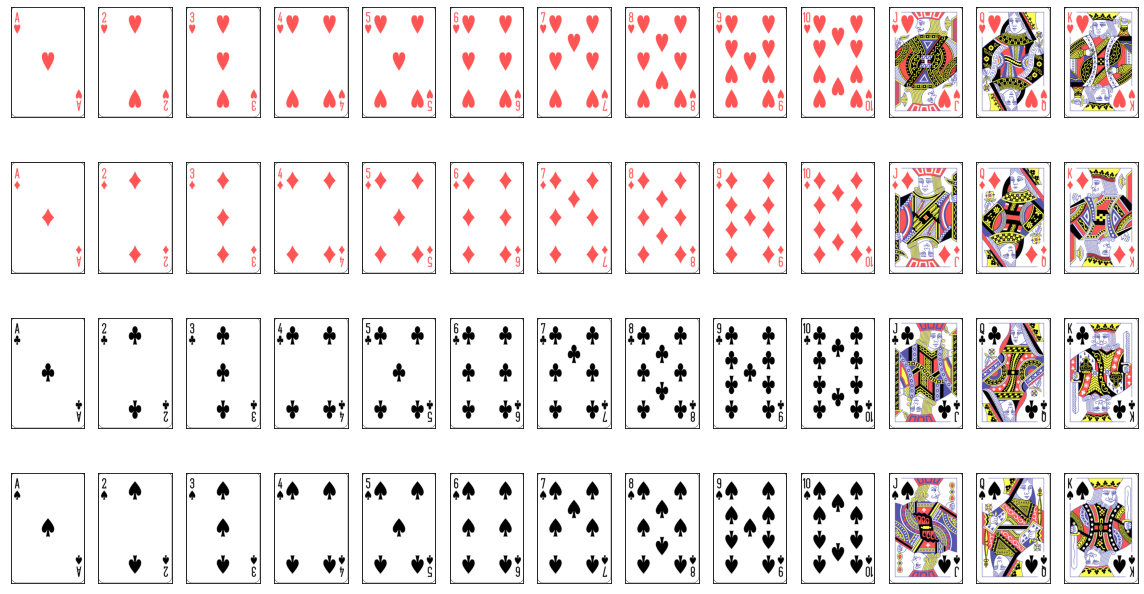

In [28]:
figure, axes_list = plt.subplots(nrows=4, ncols=13)

# added next two statements to increase figure size in notebook
figure.set_figwidth(16)
figure.set_figheight(9)

for axes in axes_list.ravel():
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    image_name = deck_of_cards.deal_card().image_name
    img = mpimg.imread(str(path.joinpath(image_name).resolve()))
    axes.imshow(img)

figure.tight_layout()

#### Shuffle and Re-Deal the Deck

In [29]:
deck_of_cards.shuffle()

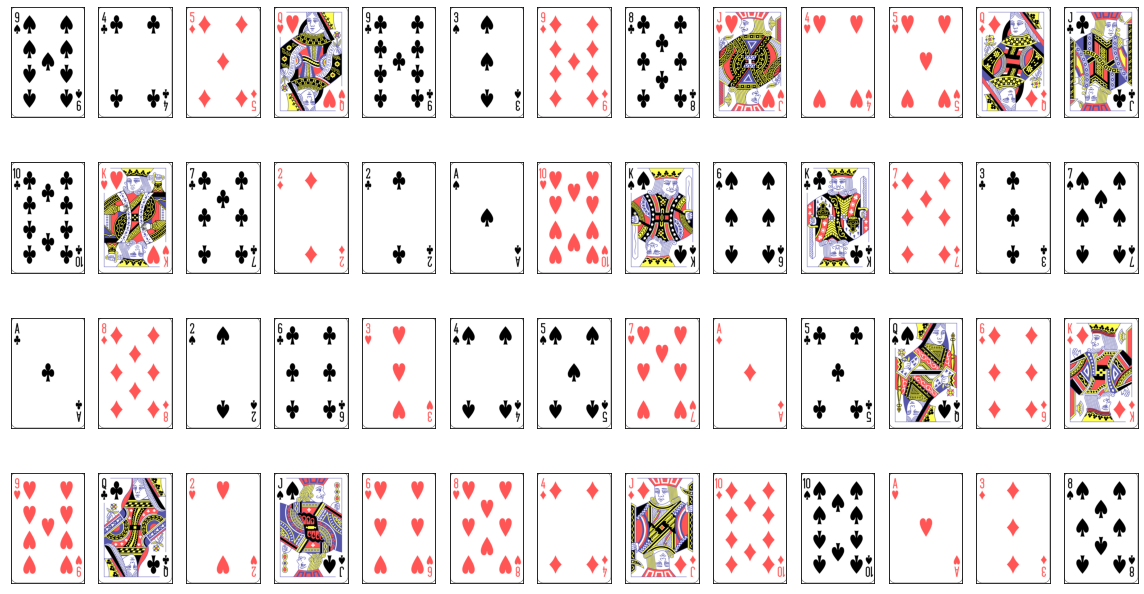

In [30]:
# added this statement to create a separate figure in the notebook
figure, axes_list = plt.subplots(nrows=4, ncols=13)

# added next two statements to increase figure size in notebook
figure.set_figwidth(16)
figure.set_figheight(9)

for axes in axes_list.ravel():
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    image_name = deck_of_cards.deal_card().image_name
    img = mpimg.imread(str(path.joinpath(image_name).resolve()))
    axes.imshow(img)
    
# added this statement for execution in the notebook
figure.tight_layout()